In [1]:
from FeatureVisualisation.visualizer import *
from FeatureVisualisation.utilities import *
from FeatureVisualisation.regularizers import *

from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

In [3]:
from skimage.transform import resize

In [4]:
from pandas import read_json

In [5]:
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [6]:
model = VGG16(input_shape=(224, 224, 3), include_top=True, weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
classes = read_json("~/.keras/models/imagenet_class_index.json")

In [14]:
classes[22][1]

'bald_eagle'

In [29]:
visualizer = Visualizer(model)

In [66]:
for i in [348]:#range(960, 1000):
    # Set which layer / filters to maximize
    visualizer.set_layer_filter("block5_pool", [i],
                                regularizer=(L1, 1),
                                activation=False
                                )

    # Optimize for 300 steps and apply transformations
    image = visualizer.optimize(max_iter=600,
                                verbose=True,
                                transforms=[
                                    Blur(1), Jitter(2), Scale(10)
                                ],
                                learning_rate=1,
                                input_image=preprocess_input(dog))
    # Save image
    #fname = str(i) + "_" + classes[i][1] + ".png"
    #print("Saving...", fname)
    #plt.imshow(image)
    #plt.show()
    imsave("block5_348.png", image)

Optimizing on loss objective... Objective - Layer(s) = ['block5_pool'] - neuron/filters(s) =  [348]
Step 1 of 600 - Loss = 0.0
Step 11 of 600 - Loss = 0.0
Step 21 of 600 - Loss = 0.0
Step 31 of 600 - Loss = 0.0
Step 41 of 600 - Loss = 0.0
Step 51 of 600 - Loss = 0.0
Step 61 of 600 - Loss = 0.0
Step 71 of 600 - Loss = 0.0


KeyboardInterrupt: 

In [15]:
model_in = model.get_input_at(0)
model_out = model.get_layer("block5_pool").output

activations = K.Function(inputs=[model_in], outputs=[model_out])

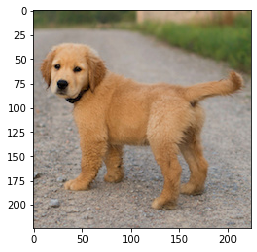

In [17]:
dog = imread("./dog.jpg")

plt.imshow(dog)
plt.show()

In [18]:
A = activations([preprocess_input(dog)[np.newaxis, ...]])[0];
A.shape

(1, 7, 7, 512)

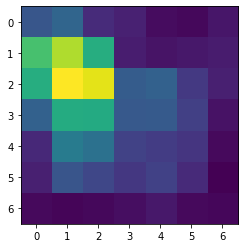

In [21]:
plt.imshow(np.sum(A[0], axis=-1))
plt.show()

In [10]:
visualizer = Visualizer(model)

In [32]:
import json

In [58]:
activation_dict = {}

images = []
for i in range(7):
    for j in range(7):
        print("({0}, {1})".format(i, j), end=" ")
        preds = A[0][i, j, :]
        
        ind = [val.item() for val in np.argpartition(preds, -5)[-5:].astype("int32")]
        
        values = [val.item() for val in preds[ind].astype("int32")]
        
        activation_dict[str((i, j))] = {"indices" : ind, "values" : values}
        
#         visualizer.set_layer_filter(layer_names=["block4_pool"]*5, filter_idxs=ind,
#                                 regularizer=(L1, 0.1),
#                                 activation=False
#                                 )

#         # Optimize for 300 steps and apply transformations
#         image = visualizer.optimize(max_iter=200,
#                                 verbose=False,
#                                 transforms=[
#                                     Blur(1), Jitter(2), Scale(10)
#                                 ],
#                                 learning_rate=0.1)
    
# #     plt.imshow(image);
# #     plt.show()
    
#         # Save image
#         print("Saving...")
#         imsave("./dog/{0}_{1}_dog_block4.png".format(i, j), image)

(0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (0, 5) (0, 6) (1, 0) (1, 1) (1, 2) (1, 3) (1, 4) (1, 5) (1, 6) (2, 0) (2, 1) (2, 2) (2, 3) (2, 4) (2, 5) (2, 6) (3, 0) (3, 1) (3, 2) (3, 3) (3, 4) (3, 5) (3, 6) (4, 0) (4, 1) (4, 2) (4, 3) (4, 4) (4, 5) (4, 6) (5, 0) (5, 1) (5, 2) (5, 3) (5, 4) (5, 5) (5, 6) (6, 0) (6, 1) (6, 2) (6, 3) (6, 4) (6, 5) (6, 6) 

In [59]:
activation_dict

{'(0, 0)': {'indices': [30, 191, 56, 154, 351],
  'values': [55, 65, 67, 61, 69]},
 '(0, 1)': {'indices': [148, 36, 30, 274, 351],
  'values': [70, 88, 74, 82, 79]},
 '(0, 2)': {'indices': [191, 148, 298, 56, 500],
  'values': [36, 57, 51, 43, 46]},
 '(0, 3)': {'indices': [412, 372, 56, 298, 191],
  'values': [27, 33, 42, 54, 46]},
 '(0, 4)': {'indices': [34, 298, 412, 372, 191],
  'values': [18, 20, 25, 35, 41]},
 '(0, 5)': {'indices': [500, 344, 40, 191, 372],
  'values': [15, 16, 19, 41, 31]},
 '(0, 6)': {'indices': [56, 412, 191, 40, 372],
  'values': [24, 28, 59, 36, 29]},
 '(1, 0)': {'indices': [433, 476, 492, 330, 351],
  'values': [148, 169, 173, 183, 281]},
 '(1, 1)': {'indices': [330, 404, 351, 39, 485],
  'values': [214, 302, 414, 232, 220]},
 '(1, 2)': {'indices': [143, 274, 404, 485, 351],
  'values': [98, 119, 174, 179, 217]},
 '(1, 3)': {'indices': [412, 184, 123, 34, 298],
  'values': [25, 26, 28, 47, 31]},
 '(1, 4)': {'indices': [127, 123, 298, 34, 412],
  'values': [2

In [60]:
dump = json.dumps(activation_dict)
print(dump)

{"(0, 0)": {"indices": [30, 191, 56, 154, 351], "values": [55, 65, 67, 61, 69]}, "(0, 1)": {"indices": [148, 36, 30, 274, 351], "values": [70, 88, 74, 82, 79]}, "(0, 2)": {"indices": [191, 148, 298, 56, 500], "values": [36, 57, 51, 43, 46]}, "(0, 3)": {"indices": [412, 372, 56, 298, 191], "values": [27, 33, 42, 54, 46]}, "(0, 4)": {"indices": [34, 298, 412, 372, 191], "values": [18, 20, 25, 35, 41]}, "(0, 5)": {"indices": [500, 344, 40, 191, 372], "values": [15, 16, 19, 41, 31]}, "(0, 6)": {"indices": [56, 412, 191, 40, 372], "values": [24, 28, 59, 36, 29]}, "(1, 0)": {"indices": [433, 476, 492, 330, 351], "values": [148, 169, 173, 183, 281]}, "(1, 1)": {"indices": [330, 404, 351, 39, 485], "values": [214, 302, 414, 232, 220]}, "(1, 2)": {"indices": [143, 274, 404, 485, 351], "values": [98, 119, 174, 179, 217]}, "(1, 3)": {"indices": [412, 184, 123, 34, 298], "values": [25, 26, 28, 47, 31]}, "(1, 4)": {"indices": [127, 123, 298, 34, 412], "values": [20, 23, 24, 28, 25]}, "(1, 5)": {"in

In [68]:
dog.shape

(224, 224, 3)

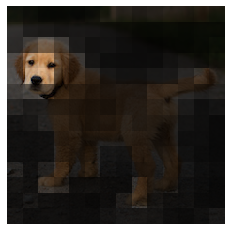

In [128]:
# Resize alpha 
alpha = resize(np.sum(A[0], axis=-1), (224, 224), order=0)[:, :, np.newaxis]
# Scale values
alpha = alpha / np.max(alpha)
alpha = 1 - alpha

# Create black image
black = np.zeros((224, 224, 3))
# Add alpha channel
black_alpha = np.concatenate([black, alpha], axis=-1)

# Plot
plt.imshow(dog)
plt.imshow(black_alpha)
plt.axis("off")
plt.show()

## Matrix Factorisation

In [22]:
A.shape

(1, 7, 7, 512)

In [168]:
n_groups = 4
nmf = ChannelReducer(n_groups, "NMF")

In [181]:
spatial_factors = nmf.fit_transform(A)[0].transpose(2, 0, 1).astype("float32")
channel_factors = nmf._reducer.components_.astype("float32")

In [182]:
# Let's organize the channels based on their horizontal position in the image
x_peak = np.argmax(spatial_factors.max(1), 1)
ns_sorted = np.argsort(x_peak)
spatial_factors = spatial_factors[ns_sorted]
channel_factors = channel_factors[ns_sorted]

In [214]:
# And create a feature visualziation of each group
# Set which layer / filters to maximize
images = []
for i in range(n_groups):
    # Get top k groups
    k = 5    
    indices = [val.item() for val in np.argpartition(channel_factors[i], -k)[-k:].astype("int32")]
    weights = channel_factors[i][indices]  
        
    
    visualizer.set_layer_filter(["block5_pool"]*k, indices, weights=weights,
                            regularizer=(L1, 1),
                            activation=False
                            )
    
    # Optimize for 300 steps and apply transformations
    image = visualizer.optimize(max_iter=400,
                            verbose=True,
                            transforms=[
                                Blur(1), Jitter(2), Scale(10)
                            ],
                            learning_rate=1,
                            )

    images.append(image)


Optimizing on loss objective... Objective - Layer(s) = ['block5_pool', 'block5_pool', 'block5_pool', 'block5_pool', 'block5_pool'] - neuron/filters(s) =  [39, 485, 274, 404, 351]
Step 1 of 400 - Loss = 0.024448199197649956
Step 11 of 400 - Loss = 1922.4974365234375
Step 21 of 400 - Loss = 28200.869140625
Step 31 of 400 - Loss = 37598.7265625
Step 41 of 400 - Loss = 49018.8671875
Step 51 of 400 - Loss = 61633.2890625
Step 61 of 400 - Loss = 61761.76171875
Step 71 of 400 - Loss = 72584.5859375
Step 81 of 400 - Loss = 82319.5859375
Step 91 of 400 - Loss = 90914.109375
Step 101 of 400 - Loss = 99101.6875
Step 111 of 400 - Loss = 109278.0078125
Step 121 of 400 - Loss = 108220.640625
Step 131 of 400 - Loss = 120057.4921875
Step 141 of 400 - Loss = 122987.140625
Step 151 of 400 - Loss = 123952.8125
Step 161 of 400 - Loss = 127194.421875
Step 171 of 400 - Loss = 132560.6875
Step 181 of 400 - Loss = 120494.25
Step 191 of 400 - Loss = 141794.125
Step 201 of 400 - Loss = 142760.34375
Step 211 of 

In [188]:
# We'd also like to know about attribution

# First, let's turn each group into a vector over activations
group_vecs = [spatial_factors[i, ..., None]*channel_factors[i] for i in range(n_groups)]

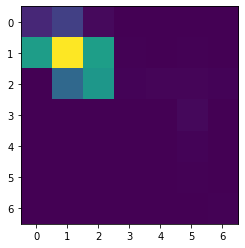

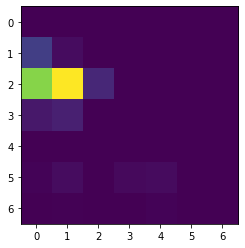

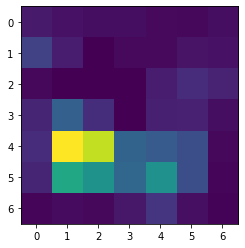

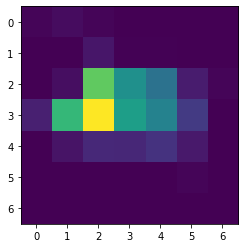

In [189]:
for i in range(n_groups):
    plt.imshow(np.sum(group_vecs[i], axis=-1))
    plt.show()

In [50]:
spatial_factors.shape

(3, 7, 7)

In [190]:
alphas = [ factor[..., None]/np.percentile(spatial_factors,99)*[1,0,0] for factor in spatial_factors]

In [191]:
alphas[2][..., 0].shape

(7, 7)

In [208]:
colors = [[46, 134, 171], [245, 247, 73], [242, 66, 54], [237, 33, 124]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


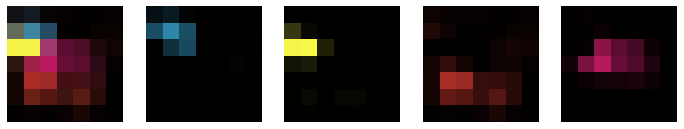

In [212]:
black = np.zeros((7, 7, 3))
colored_images = []

for color in colors:
    colored_images.append(createColorImage(color, 7))

# plot with alphas:
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
axes[0].imshow(black)
for i, group in enumerate(colored_images):
    group_alpha = np.concatenate([group, alphas[i][:, :, 0][:, :, np.newaxis]], axis=-1)
    
    axes[i+1].imshow(black)
    axes[i+1].imshow(group_alpha)
    axes[0].imshow(group_alpha)
    axes[i+1].axis("off")
    
axes[0].axis("off")
plt.show()

In [154]:
def createColorImage(color, dim):
    return np.multiply(np.ones([dim, dim, 3]), np.array(color)) / 255.

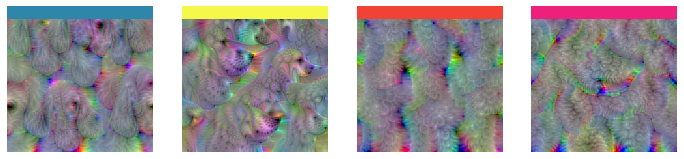

In [215]:
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
for i, image in enumerate(images):
    # Add strip of color to top of image
    image[0:20, :] = colors[i]
    # plot
    axes[i].imshow(image)
    axes[i].axis("off")
plt.show()

<hr>

In [130]:
K.clear_session()

In [131]:
import tensorflow as tf
import numpy as np
import pandas as pd
np.random.seed(0)

In [158]:
A_orig = np.array([[3, 4, 5, 2, 4, 2, 5],
                   [4, 4, 3, 3, 4, 1, 4],
                   [5, 5, 4, 4, 2, 5, 5]], dtype=np.float32).T

A_orig_df = pd.DataFrame(A_orig)
A_orig_df

,0,1,2
0,3.0,4.0,5.0
1,4.0,4.0,5.0
2,5.0,3.0,4.0
3,2.0,3.0,4.0
4,4.0,4.0,2.0
5,2.0,1.0,5.0
6,5.0,4.0,5.0


In [163]:
# Mask some entries
A_df_masked = A_orig_df.copy()
A_df_masked.iloc[0,0]=np.NAN
A_df_masked.iloc[0,0]=np.NAN
A_df_masked.iloc[1,0]=np.NAN
A_df_masked.iloc[5,1]=np.NAN
A_df_masked.iloc[5,1]=np.NAN
A_df_masked.iloc[4,2]=np.NAN
A_df_masked.iloc[3,2]=np.NAN

In [164]:
A_df_masked

,0,1,2
0,NaN,4.0,5.0
1,NaN,4.0,5.0
2,5.0,3.0,4.0
3,2.0,3.0,NaN
4,4.0,4.0,NaN
5,2.0,NaN,5.0
6,5.0,4.0,5.0


In [165]:
np_mask = A_df_masked.notnull()
np_mask

,0,1,2
0,False,True,True
1,False,True,True
2,True,True,True
3,True,True,False
4,True,True,False
5,True,False,True
6,True,True,True


In [175]:
# Tensorflow Setup
tf.reset_default_graph()

# Boolean mask for computing cost only on valid (not missing) entries
tf_mask = tf.Variable(np_mask.values)

# This is the ground-truth
A = tf.constant(A_df_masked.values)
shape = A_df_masked.values.shape

# latent factors
rank = 3

# Initializing random H and W
temp_H = np.random.randn(rank, shape[1]).astype(np.float32)
temp_H = np.divide(temp_H, temp_H.max())

temp_W = np.random.randn(shape[0], rank).astype(np.float32)
temp_W = np.divide(temp_W, temp_W.max())

H =  tf.Variable(temp_H)
W = tf.Variable(temp_W)
WH = tf.matmul(W, H)

In [176]:
# cost of Frobenius norm
cost = tf.reduce_sum(tf.pow(tf.boolean_mask(A, tf_mask) - tf.boolean_mask(WH, tf_mask), 2))

In [177]:
# Learning rate
lr = 0.001
# Number of steps
steps = 1000
train_step = tf.train.GradientDescentOptimizer(lr).minimize(cost)
# Initialise the global variables
init = tf.global_variables_initializer()

In [178]:
# Clipping operation. This ensure that W and H learnt are non-negative
clip_W = W.assign(tf.maximum(tf.zeros_like(W), W))
clip_H = H.assign(tf.maximum(tf.zeros_like(H), H))
clip = tf.group(clip_W, clip_H)

In [179]:
# Optimize
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        sess.run(train_step)
        sess.run(clip)
        if i%10==0:
            print("\nCost: %f" % sess.run(cost))
            print("*"*40)
    learnt_W = sess.run(W)
    learnt_H = sess.run(H)


Cost: 253.713959
****************************************

Cost: 231.990906
****************************************

Cost: 203.798203
****************************************

Cost: 167.961273
****************************************

Cost: 127.131226
****************************************

Cost: 87.624863
****************************************

Cost: 55.880756
****************************************

Cost: 34.405457
****************************************

Cost: 21.611912
****************************************

Cost: 14.508154
****************************************

Cost: 10.655433
****************************************

Cost: 8.559566
****************************************

Cost: 7.404631
****************************************

Cost: 6.758704
****************************************

Cost: 6.391816
****************************************

Cost: 6.179942
****************************************

Cost: 6.054728
****************************************

Cost: 5.978299

In [180]:
learnt_H

array([[2.6971598 , 1.9847834 , 2.049792  ],
       [0.        , 0.7013609 , 0.00600616],
       [0.36703077, 0.80703616, 1.9542135 ]], dtype=float32)

In [181]:
learnt_W

array([[1.695094  , 0.0512634 , 0.76547635],
       [1.736884  , 0.03022951, 0.7103469 ],
       [1.6075443 , 0.        , 0.40461102],
       [0.8201367 , 0.69898754, 0.51866204],
       [1.4825683 , 0.25983965, 0.7159883 ],
       [0.58851254, 0.00424509, 1.814382  ],
       [1.6445504 , 0.00935027, 0.93361104]], dtype=float32)

In [182]:
# Now make a prediction
pred = np.dot(learnt_W, learnt_H)
pred_df = pd.DataFrame(pred)
pred_df.round()

,0,1,2
0,5.0,4.0,5.0
1,5.0,4.0,5.0
2,4.0,4.0,4.0
3,2.0,3.0,3.0
4,4.0,4.0,4.0
5,2.0,3.0,5.0
6,5.0,4.0,5.0


In [183]:
A_orig_df

,0,1,2
0,3.0,4.0,5.0
1,4.0,4.0,5.0
2,5.0,3.0,4.0
3,2.0,3.0,4.0
4,4.0,4.0,2.0
5,2.0,1.0,5.0
6,5.0,4.0,5.0


In [185]:
A

<tf.Tensor 'Const:0' shape=(7, 3) dtype=float32>